In [70]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import warnings
warnings.filterwarnings("ignore")

In [72]:
symbol_list = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'NVDA']

In [73]:
AAPL = pd.read_csv('AAPL.csv')
MSFT = pd.read_csv('MSFT.csv')
GOOGL = pd.read_csv('GOOGL.csv')
AMZN = pd.read_csv('AMZN.csv')
NVDA = pd.read_csv('NVDA.csv')

# Select 5 stocks close price and volume comparison 
Those stocks are from Top 10 stocks of company analysis  \\
Frome the chart, we can see that the trends of these 5 stocks are basically very similar with each other and S&P 500 index.

In [74]:
fig = go.Figure()
fig.add_scatter(x=AAPL['Date'], y=AAPL['Close'], mode='lines',name='AAPL')
fig.add_scatter(x=MSFT['Date'], y=MSFT['Close'], mode='lines',name='MSFT')
fig.add_scatter(x=GOOGL['Date'], y=GOOGL['Close'], mode='lines',name='GOOGL')
fig.add_scatter(x=AMZN['Date'], y=AMZN['Close'], mode='lines',name='AMZN')
fig.add_scatter(x=NVDA['Date'], y=NVDA['Close'], mode='lines',name='NVDA')
fig.show()

In [75]:
fig = go.Figure()
fig.add_scatter(x=AAPL['Date'], y=AAPL['Volume'], mode='lines',name='AAPL')
fig.add_scatter(x=MSFT['Date'], y=MSFT['Volume'], mode='lines',name='MSFT')
fig.add_scatter(x=GOOGL['Date'], y=GOOGL['Volume'], mode='lines',name='GOOGL')
fig.add_scatter(x=AMZN['Date'], y=AMZN['Volume'], mode='lines',name='AMZN')
fig.add_scatter(x=NVDA['Date'], y=NVDA['Volume'], mode='lines',name='NVDA')
fig.show()

# Prediction
## AAPL

In [76]:
# AAPL
data = AAPL.filter(['Close'])
dataset = data.values
training_data_len = int(np.ceil( len(dataset) * .95 ))

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

train_data = scaled_data[0:int(training_data_len), :]
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=1, epochs=1)

[array([0.00439888, 0.00486851, 0.00584392, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.00655794, 0.00622217, 0.00726133,
       0.00819848, 0.00790947, 0.0063263 , 0.00783722, 0.00634968,
       0.01192796, 0.01149657, 0.01205972, 0.01327737, 0.01401476,
       0.01395314, 0.01372576, 0.01469479, 0.01560643, 0.01663922,
       0.01830739, 0.02181161, 0.02186474, 0.02381555, 0.02527334,
       0.0227679 , 0.02373267, 0.02371355, 0.02641875, 0.02603411,
       0.026746  , 0.02802528, 0.02873718, 0.03078787, 0.03228178,
       0.03271316, 0.03286405, 0.03030974, 0.02969346, 0.02978484,
       0.03218616, 0.03286193, 0.03431335, 0.03773469, 0.04229932,
       0.04144504, 0.04144717, 0.04474738, 0.04578017, 0.04504489,
       0.04437338, 0.04367423, 0.04599691, 0.04759072, 0.04825799])]
[0.04660893556292853]

[array([0.00439888, 0.00486851, 0.00584392, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.00655794, 0.00622217, 0.00726133,
       0.00819848, 0.00790947, 0.00

In [77]:
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5/5 [==============================] - 1s 46ms/step


5.767819788363095

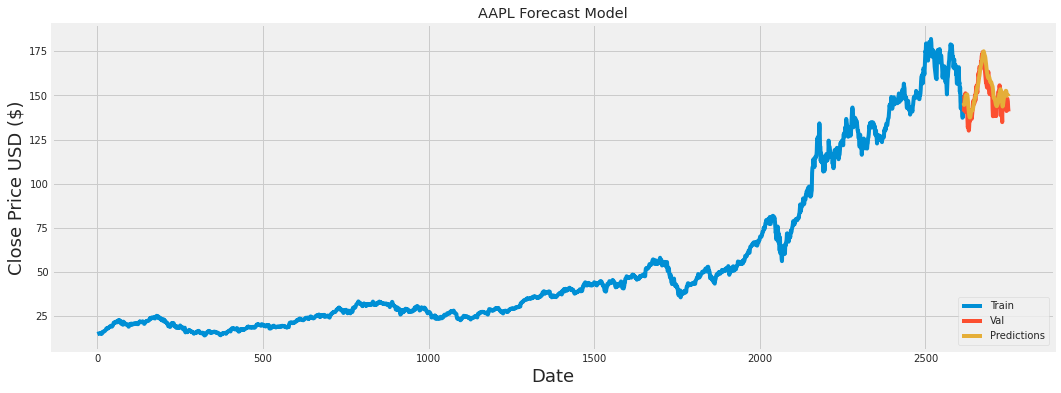

In [78]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('AAPL Forecast Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

## MSFT

In [79]:
# MSFT
data = MSFT.filter(['Close'])
dataset = data.values
training_data_len = int(np.ceil( len(dataset) * .95 ))

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

train_data = scaled_data[0:int(training_data_len), :]
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=1, epochs=1)

[array([0.00126286, 0.00325188, 0.00413588, 0.00549346, 0.00432531,
       0.00464103, 0.00426216, 0.00514617, 0.00593546, 0.00596704,
       0.00587232, 0.00552504, 0.01054492, 0.01060807, 0.00937677,
       0.01007135, 0.00988192, 0.00902949, 0.01022921, 0.00997664,
       0.01111321, 0.01130265, 0.01221822, 0.01209194, 0.01256551,
       0.01354423, 0.01389152, 0.01303908, 0.01329166, 0.01224979,
       0.01161836, 0.01553325, 0.01540696, 0.01600682, 0.0154701 ,
       0.01578582, 0.0161331 , 0.01572267, 0.0173644 , 0.01695397,
       0.01869041, 0.01802741, 0.01714339, 0.01638567, 0.01726968,
       0.01780639, 0.01774326, 0.01790112, 0.01989012, 0.02020584,
       0.02045841, 0.01966912, 0.01840626, 0.01774326, 0.01749068,
       0.01777483, 0.01780639, 0.01963756, 0.01941655, 0.01837469])]
[0.018153685326952593]

[array([0.00126286, 0.00325188, 0.00413588, 0.00549346, 0.00432531,
       0.00464103, 0.00426216, 0.00514617, 0.00593546, 0.00596704,
       0.00587232, 0.00552504, 0.0

In [80]:
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5/5 [==============================] - 1s 42ms/step


16.23934851035146

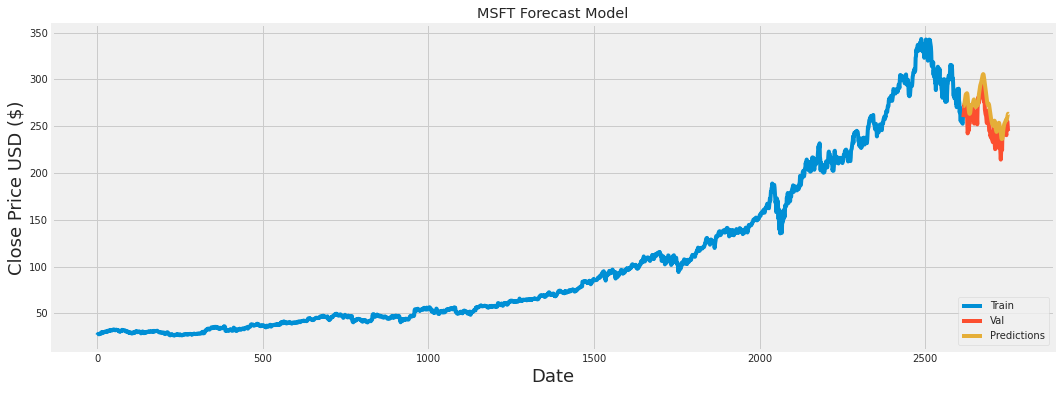

In [81]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#train.to_csv('Mtrain.csv', encoding='utf-8', index=False)
#valid.to_csv('Mvalid.csv', encoding='utf-8', index=False)
#pr = pd.DataFrame(predictions, columns = ['predictions'])
#pr.to_csv('Mpredictions.csv', encoding='utf-8', index=False)
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('MSFT Forecast Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

## GOOGL

In [82]:
# GOOGL
data = GOOGL.filter(['Close'])
dataset = data.values
training_data_len = int(np.ceil( len(dataset) * .95 ))

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

train_data = scaled_data[0:int(training_data_len), :]
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=1, epochs=1)

[array([0.0195929 , 0.0201216 , 0.01841393, 0.01675787, 0.01168095,
       0.01180622, 0.0123257 , 0.0130036 , 0.01214701, 0.01280833,
       0.01360598, 0.01483284, 0.0049627 , 0.00487612, 0.00403059,
       0.00192319, 0.00166713, 0.00385558, 0.00343374, 0.00387953,
       0.00401216, 0.00480059, 0.00686746, 0.00921802, 0.00879065,
       0.00935803, 0.00965461, 0.00863223, 0.00979092, 0.00934144,
       0.00856775, 0.00874459, 0.00839827, 0.01012251, 0.00900618,
       0.00866907, 0.00936724, 0.00925855, 0.0109312 , 0.01090542,
       0.0116699 , 0.01145806, 0.01016857, 0.00845722, 0.00879617,
       0.00885881, 0.00758958, 0.00849223, 0.01081884, 0.01048909,
       0.01143595, 0.01215622, 0.01380308, 0.01371282, 0.01490837,
       0.01602654, 0.01538917, 0.01663075, 0.01620523, 0.01781524])]
[0.016461285433753164]

[array([0.0195929 , 0.0201216 , 0.01841393, 0.01675787, 0.01168095,
       0.01180622, 0.0123257 , 0.0130036 , 0.01214701, 0.01280833,
       0.01360598, 0.01483284, 0.0

In [ ]:
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,6))
plt.title('GOOGL Forecast Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

## AMZN

In [83]:
# AMZN
data = AMZN.filter(['Close'])
dataset = data.values
training_data_len = int(np.ceil( len(dataset) * .95 ))

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

train_data = scaled_data[0:int(training_data_len), :]
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=1, epochs=1)

[array([0.00087189, 0.00044438, 0.00047251, 0.00187879, 0.0007397 ,
       0.00095908, 0.00083533, 0.        , 0.00070033, 0.0016116 ,
       0.00379977, 0.00520886, 0.00421884, 0.00285756, 0.0031135 ,
       0.00333851, 0.00489104, 0.00546762, 0.00456197, 0.00520605,
       0.00099283, 0.00162847, 0.00330476, 0.00202786, 0.00232317,
       0.00268599, 0.00254537, 0.00270287, 0.00440447, 0.0043229 ,
       0.00240193, 0.00112502, 0.00184785, 0.00178035, 0.00130784,
       0.00083252, 0.00090002, 0.00073127, 0.00221348, 0.00105752,
       0.00115596, 0.00094783, 0.00121784, 0.00145128, 0.00220505,
       0.00329351, 0.00235974, 0.00209817, 0.00243568, 0.00178035,
       0.00239068, 0.00256505, 0.00269724, 0.0046126 , 0.00444384,
       0.00463229, 0.0053748 , 0.00757704, 0.00829986, 0.00709609])]
[0.008066421592953336]

[array([0.00087189, 0.00044438, 0.00047251, 0.00187879, 0.0007397 ,
       0.00095908, 0.00083533, 0.        , 0.00070033, 0.0016116 ,
       0.00379977, 0.00520886, 0.0

In [ ]:
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,6))
plt.title('AMZN Forecast Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

## NVDA

In [ ]:
# NVDA
data = NVDA.filter(['Close'])
dataset = data.values
training_data_len = int(np.ceil( len(dataset) * .95 ))

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

train_data = scaled_data[0:int(training_data_len), :]
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=1, epochs=1)

In [84]:
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5/5 [==============================] - 1s 38ms/step


10.330700034030997

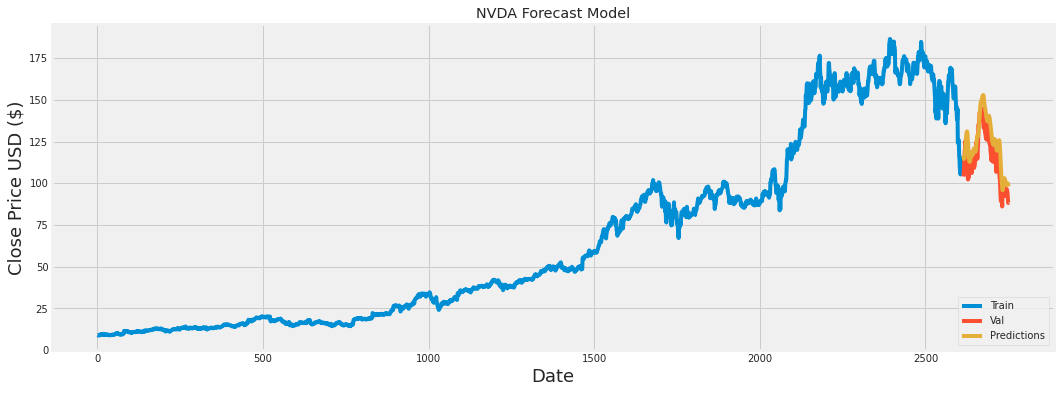

In [85]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,6))
plt.title('NVDA Forecast Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()